In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.drop(columns='CustomerId',inplace =True)

In [ ]:
data


,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data=data.join(pd.get_dummies(data['Geography'])).drop(columns='Geography')


In [ ]:
data =data.join(pd.get_dummies(data['Gender'],drop_first=True).astype(int)).drop(columns='Gender')

In [ ]:
data.drop(columns='Surname',inplace =True)

In [ ]:
data

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,1
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,1
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,0
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,1


In [ ]:
x=data.drop(columns='Exited')
y=data['Exited']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction=logistic.predict(x_test)

In [ ]:
accuracy_score(y_test,prediction)

0.8136666666666666

<Axes: >

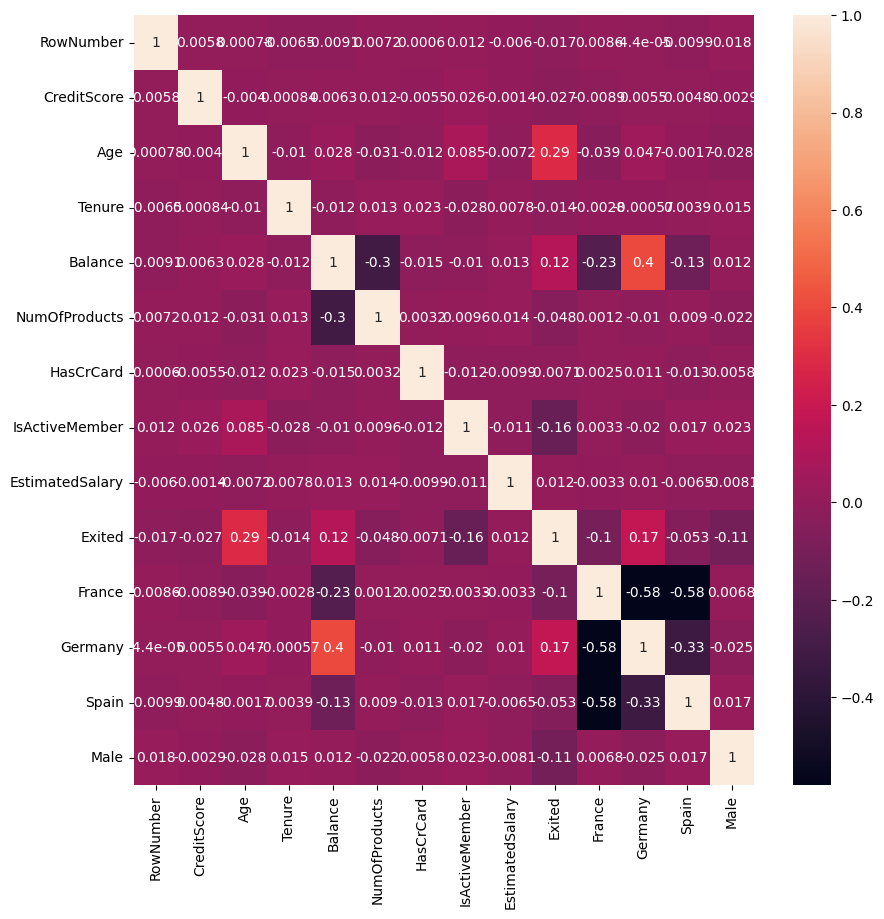

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
auc_score = roc_auc_score(y_test, prediction)  # AUC Score
accuracy = accuracy_score(y_test, prediction)  # Accuracy Score


metrics_table = pd.DataFrame({
    'Metric': ['AUC', 'Accuracy'],
    'Value': [auc_score, accuracy]
})


print(metrics_table)

     Metric     Value
0       AUC  0.590488
1  Accuracy  0.813667


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

In [ ]:
#roc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()